# КВБО-01-21 Марченко Сергей

# 1.6
## Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.
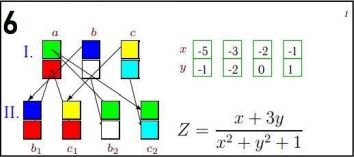

In [25]:
def z_quality(x, y):
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1)


def exchange_scheme(old_x, old_y, sorted_id):
    x = [0 for _ in range(4)]
    y = [0 for _ in range(4)]
    x[2] = old_x[sorted_id[2]]
    x[3] = old_x[sorted_id[2]]
    x[0] = old_x[sorted_id[0]]
    x[1] = old_x[sorted_id[1]]
    y[0] = old_y[sorted_id[2]]
    y[1] = old_y[sorted_id[2]]
    y[2] = old_y[sorted_id[0]]
    y[3] = old_y[sorted_id[1]]
    return x, y


def sort(z):
    return sorted(range(len(z)), key=lambda i: z[i])


def evolution_step(x, y, z):
    _, min_id = min((value, key) for key, value in enumerate(z))

    x = x[:]
    y = y[:]
    z = z[:]

    x.pop(min_id)
    y.pop(min_id)
    z.pop(min_id)

    return x, y, z


def evolution_steps(x, y, steps=4):
    results = []

    for i in range(steps):
        z_list = [z_quality(x, y[i]) for i, x in enumerate(x)]
        x, y, z = evolution_step(x, y, z_list)
        x, y = exchange_scheme(x, y, sort(z))
        results.append([x, y, sum(z_list), z_list])

    return x, y, results


def main():
    x = [-5, -3, -2, -1]
    y = [-1, -2, 0, 1]
    results = evolution_steps(x, y)

    quality = []
    for i in range(len(results[2])):
        print(f'max_{i + 1}_step: {results[2][i][2]}')
        quality += results[2][i][3]

    print(f'max Z:{max(quality)}')

if __name__ == '__main__':
    main()

max_1_step: -0.6724867724867726
max_2_step: -1.7407407407407407
max_3_step: 0.35925925925925917
max_4_step: 1.4259259259259258
max Z:0.6666666666666666


# 2.8
## Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.
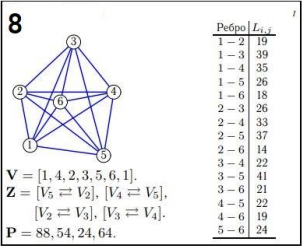

лучший выбранный маршрут: [1, 4, 2, 3, 5, 6, 1]
длина лучшего выбранного маршрута: 177
длины всех рассмотренных маршрутов: [177, 177, 177, 177, 177]


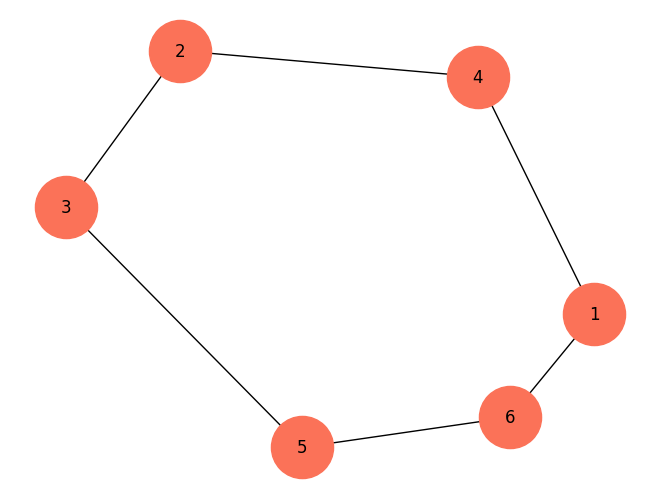

In [24]:
from math import e
import networkx as nx


def probability(delta, t):
    return 100 * e ** (-delta / t)


def reduce_temp(prev_temp):
    next_temp = 0.5 * prev_temp
    return next_temp


def edge_length(i, j, distances, round_trip=True):
    if round_trip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def route_length(v, distances):
    edges = []
    for i in range(len(v) - 1):
        edges.append(edge_length(v[i], v[i + 1], distances))
    return sum(edges)


def swap_first_and_second_indexes(v, z, by_name=True):
    v[z[0] - by_name], v[z[1] - by_name] = v[z[1] - by_name], v[z[0] - by_name]
    return v


def route_replacement(v, z):
    for i in z:
        v = swap_first_and_second_indexes(v, z)
    return v


def choose_route(distances, v, z, t, p):
    sum_length = route_length(v, distances)
    sum_list = [sum_length]

    for i in range(len(z)):
        new_v = route_replacement(v[:], z[i])
        new_s = route_length(new_v, distances)
        sum_list.append(new_s)
        delta_s = new_s - sum_length

        if delta_s <= 0 or probability(delta_s, t) > p[i]:
            v = new_v
            sum_length = new_s

        t = reduce_temp(t)

    return v, sum_list


def draw_route_graph(distances, best_route):
    new_distances = []

    for i in range(len(best_route) - 1):
        for distance in distances:
            if distance[0] == best_route[i] and distance[1] == best_route[i + 1] or \
                    distance[1] == best_route[i] and distance[0] == best_route[i + 1]:
                new_distances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(new_distances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


def main():
    distances = [(1, 2, 19),
                 (1, 3, 39),
                 (1, 4, 35),
                 (1, 5, 26),
                 (1, 6, 18),
                 (2, 3, 26),
                 (2, 4, 33),
                 (2, 5, 37),
                 (2, 6, 14),
                 (3, 4, 22),
                 (3, 5, 41),
                 (3, 6, 21),
                 (4, 5, 22),
                 (4, 6, 19),
                 (5, 6, 24)]

    v = [1, 4, 2, 3, 5, 6, 1]
    z = [(5, 2),
         (4, 5),
         (2, 3),
         (3, 4)]
    p = [88, 54, 24, 64]

    t = 100

    best_route, length = choose_route(distances, v, z, t, p)
    print(f'лучший выбранный маршрут: {best_route}')
    print(f'длина лучшего выбранного маршрута: {route_length(best_route, distances)}')
    print(f'длины всех рассмотренных маршрутов: {length}')

    draw_route_graph(distances, best_route)


if __name__ == '__main__':
    main()